# Importing the necessary libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import seaborn as sns
import string

import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter





from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences




In [2]:
data = pd.read_csv('preprocessed.csv')

In [3]:
data.head()

,Unnamed: 0,Reviews,sentiment
0,0,stuning even for the non-gamer: this sound tra...,1
1,1,the best soundtrack ever to anything.: i'm rea...,1
2,2,amazing!: this soundtrack is my favorite music...,1
3,3,excellent soundtrack: i truly like this soundt...,1
4,4,"remember, pull your jaw off the floor after he...",1


In [4]:
 data =  data.drop(['Unnamed: 0'],axis=1)

In [5]:
data.head()

,Reviews,sentiment
0,stuning even for the non-gamer: this sound tra...,1
1,the best soundtrack ever to anything.: i'm rea...,1
2,amazing!: this soundtrack is my favorite music...,1
3,excellent soundtrack: i truly like this soundt...,1
4,"remember, pull your jaw off the floor after he...",1


# Data Cleaning

In [6]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    
    return text2.lower()



In [7]:
data['Reviews'] = data['Reviews'].apply(clean_text)

In [8]:
data['NUM_WORDS'] = data['Reviews'].apply(lambda x:len(str(x).split()))

In [9]:
data.head()

,Reviews,sentiment,NUM_WORDS
0,stuning even for the nongamer this sound track...,1,64
1,the best soundtrack ever anything reading lot ...,1,70
2,amazing this soundtrack favorite music all tim...,1,101
3,excellent soundtrack truly like this soundtrac...,1,97
4,remember pull your jaw off the floor after hea...,1,73


In [10]:
print(data['sentiment'].value_counts())

1    252782
0    247218
Name: sentiment, dtype: int64


In [11]:
max_sentence_length = data['NUM_WORDS'].max()

In [12]:
print('Train Max Sentence Length :'+str(max_sentence_length))

Train Max Sentence Length :169


***
Let us create a dataset having reviews of 100 words or less
***

In [13]:
mask = (data['NUM_WORDS'] < 100) & (data['NUM_WORDS'] >=20)
df_short_reviews = data[mask]
print('No of Short reviews')
print(len(df_short_reviews))

mask = data['NUM_WORDS'] >= 100
df_long_reviews = data[mask]
print('No of Long reviews')
print(len(df_long_reviews))

No of Short reviews
387949
No of Long reviews
83442


In [14]:
print(df_short_reviews['NUM_WORDS'].max())

99


***
Let us create our train and test datasets
***

In [24]:
train_data = df_short_reviews.sample(n=250000, random_state =30)
test_data = df_short_reviews.sample(n=387949-250000, random_state =20)

In [25]:
display(train_data['sentiment'].value_counts())
display(test_data['sentiment'].value_counts())

1    125690
0    124310
Name: sentiment, dtype: int64

1    69444
0    68505
Name: sentiment, dtype: int64

### Let us split the training data into train and validation datasets

### Let us convert our training,validation and test data into the format accepted by tensorflow

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data['Reviews'].tolist(),\
                                                      train_data['sentiment'].tolist(),\
                                                      test_size=0.5,\
                                                      stratify = train_data['sentiment'].tolist(),\
                                                      random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))

Train data len:125000
Class distributionCounter({1: 62845, 0: 62155})
Valid data len:125000
Class distributionCounter({1: 62845, 0: 62155})


In [27]:
num_words = 50000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)


print(str(tokenizer.texts_to_sequences(['xyz how are you'])))

   

[[1, 67, 14, 9]]


In [28]:
x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(test_data['Reviews'].tolist()) )



x_train = pad_sequences(x_train, padding='post', maxlen=100)
x_valid = pad_sequences(x_valid, padding='post', maxlen=100)
x_test = pad_sequences(x_test, padding='post', maxlen=100)



train_labels = np.asarray(y_train )
valid_labels = np.asarray( y_valid)

test_labels = np.asarray(test_data['sentiment'].tolist())

print('Train data len:'+str(len(x_train)))
print('Class distribution'+str(Counter(train_labels)))

print('Validation data len:'+str(len(x_valid)))
print('Class distribution'+str(Counter(valid_labels)))

print('Test data len:'+str(len(x_test)))
print('Class distribution'+str(Counter(test_labels)))


train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))



Train data len:125000
Class distributionCounter({1: 62845, 0: 62155})
Validation data len:125000
Class distributionCounter({1: 62845, 0: 62155})
Test data len:137949
Class distributionCounter({1: 69444, 0: 68505})


In [29]:
x_train[0]

array([   20,    11,    42,    20,     2,    82,     4,   851,  1210,
           3,   223,    19,    50,   160,     9,    96,    40,   851,
           9,    34,   116,     6,     4,  1611,   179,   584,   338,
         119,   675,    29,   654,   407,   603,   407,    85,  6726,
           7,     1,    12,     3,  1331,   859,     2,  1252,     2,
        5480,   105,   261,   796,   997, 17196,  1469,     2,   578,
           4,  1611,    19,   166,    11,    27,     8,   105,     5,
          79,  9035,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)

In [30]:
train_ds

<TensorSliceDataset shapes: ((100,), ()), types: (tf.int32, tf.int64)>


# Let us create a simple LSTM based sentiment classification  model  


In [31]:
max_features =50000
embedding_dim =16
sequence_length = 100

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.005))) 
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.LSTM(embedding_dim,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.005),\
                                                             bias_regularizer=regularizers.l2(0.005)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(8, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
                               



model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-3),metrics=[tf.keras.metrics.BinaryAccuracy()])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           800016    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 16)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 16)           2112      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               819712    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                

# Let's train our model

In [32]:
epochs = 3
# Fit the model using the train and test datasets.
history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )



Train on 125000 samples, validate on 137949 samples
Epoch 1/3


/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


125000/125000 [==============================] - 378s 3ms/sample - loss: 0.6304 - binary_accuracy: 0.8160 - val_loss: 0.5226 - val_binary_accuracy: 0.8623
Epoch 2/3
125000/125000 [==============================] - 410s 3ms/sample - loss: 0.5783 - binary_accuracy: 0.8397 - val_loss: 0.4868 - val_binary_accuracy: 0.8771
Epoch 3/3
125000/125000 [==============================] - 398s 3ms/sample - loss: 0.5612 - binary_accuracy: 0.8487 - val_loss: 0.4784 - val_binary_accuracy: 0.8801


In [33]:
history.history

{'loss': [0.6303726370162964, 0.5782813247756958, 0.5612263818511963],
 'binary_accuracy': [0.816, 0.839656, 0.848672],
 'val_loss': [0.5226059550939117, 0.4868142521635699, 0.4784170455706693],
 'val_binary_accuracy': [0.86228967, 0.87712127, 0.88006437]}

In [34]:
predictions = model.predict(x_valid)

In [35]:
predictions

array([[0.98286533],
       [0.49654192],
       [0.361448  ],
       ...,
       [0.99777424],
       [0.9799795 ],
       [0.7023812 ]], dtype=float32)

In [36]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, thresholds = sklearn.metrics.roc_curve(labels, predictions)
    plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives Rate')
    plt.ylabel('True positives Rate')
    plt.xlim([-0.03, 1.0])
    plt.ylim([0.0, 1.03])
    plt.grid(True)
    thresholdsLength = len(thresholds)
    thresholds_every = 1000
    colorMap = plt.get_cmap('jet', thresholdsLength)
    for i in range(0, thresholdsLength, thresholds_every):
        threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
        plt.text(fp[i] - 0.03, tp[i] + 0.001, threshold_value_with_max_four_decimals, fontdict={'size': 15}, color=colorMap(i/thresholdsLength));

    ax = plt.gca()
    ax.set_aspect('equal')

In [39]:
mpl.rcParams['figure.figsize'] = (16, 16)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

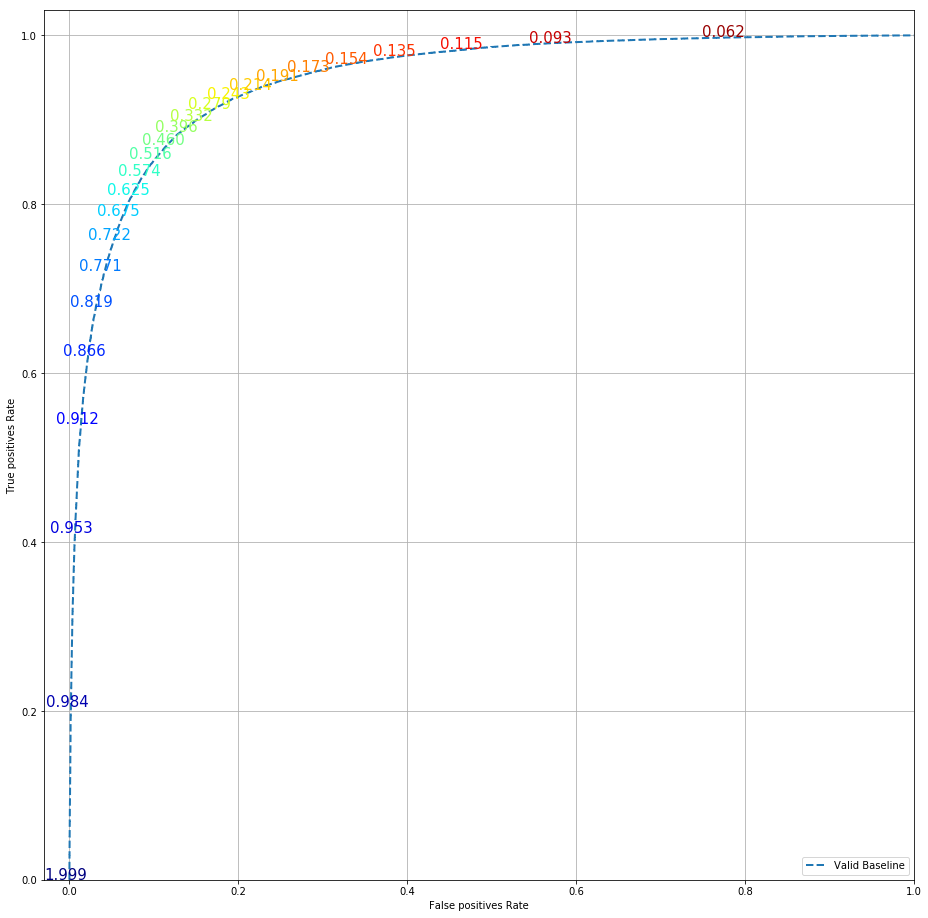

In [42]:
plot_roc("Valid Baseline", valid_labels, predictions, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [43]:
print("Generate predictions for all samples")
predictions_test = model.predict(x_test)




Generate predictions for all samples


In [45]:
test_data['pred_sentiment']= predictions_test
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment >= 0.57),1,test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment < 0.57),0,test_data.pred_sentiment)

In [46]:
labels = [0, 1]
    
print(classification_report(test_data['sentiment'].tolist(),test_data['pred_sentiment'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     68505
           1       0.91      0.84      0.87     69444

    accuracy                           0.88    137949
   macro avg       0.88      0.88      0.88    137949
weighted avg       0.88      0.88      0.88    137949

